<br>

# **Biodiversity in U.S. National Parks**

<br>

<br>

## **Table of Contents**

<br>

<br>

#### [**1: Introduction**](#Introduction)

<br>

#### [**2: Modules**](#Modules)

<br>

#### [**3: Data Cleaning**](#DataCleaning)

- ##### [**3.0: Personal Preference Options**](#PersPref)

- ##### [**3.1: species.csv**](#species)

- ##### [**3.2: observations.csv**](#observations)

- ##### [**3.3: Merged Data**](#MergedData)
  
<br>

#### [**4: Questions and Analysis**](#Q&Analysis)

- [**4.1: Which species were spotted the most at each park?**](#Q1)

> **[Figure 1:](#Figure1) Most Observed Species by National Park**

> **[Figure 2:](#Figure2) Total Observations by National Park**

> **[Figure 3:](#Figure3) Most Observed Species by Category**

> **[Figure 4:](#Figure4) Total Observations by Category**

> **[Figure 5:](#Figure5) Species Distribution by Category** 

> **[Table 1:](#Table1) Species Distribution by Category: Count and Percentage**
 
- [**4.2: How are species distributed by conservation status?**](#Q2)
  
> **[Figure 6:](#Figure6) Species Distribution by Conservation Status (Log scale)**

> **[Table 2:](#Table2) Conservation Status Distribution by Park**

> **[Table 3:](#Table3) Conservation Status Distribution by Category**

- [**4.3: Are certain types of species more likely to be endangered?**](#Q3)

> **[Table 4:](#Table4) Conservation Status Distribution Per Category in Percentages**

> **[Figure 7:](#Figure7) Species of Concern Distribution by Category**

> **[Figure 8:](#Figure8) Threatened Species Distribution by Category**

> **[Figure 9:](#Figure9) Endangered Species Distribution by Category**

- [**4.4: Are the differences between species and their conservation status significant?**](#Q4)


- [**4.4.1: Chi-squared test**](#Q4.1)

> **[Table 5:](#Table5) Category Protection Breakdown: Counts, Totals, and Percentages**

> **[Table 6:](#Table6) Chi-squared test**

<br>

#### [**5: Discussion**](#Discussion)

<br>

<br>

## **1: Introduction**
<a id='Introduction'> </a>

<br>

## Project Goals
The goal of this project was to analyze biodiversity data from the U.S. National Parks Service. To maintain the level of biodiversity within their parks, the National Park Service aims to ensure the survival of at-risk species. This is achieved by analyzing the characteristics of the species and their conservation status, as well as the species' relationship to the national parks using the frequency of sightings of those species.

A few of the questions that guided this analysis were:
- Which species were spotted the most at each National Park?
- How are species distributed by their conservation status?
- Are certain types of species more likely to be endangered?
- Are the differences between species and their conservation status significant?

<br>

## Data
The data used for this project contained two datasets. The first csv file provided information about each species and the second had records of observations of species by park location.

Both 'Observations.csv' and 'Species_info.csv' were provided by Codecademy.com.

Note: The data used for this project is inspired by real data, but is mostly fictional.

<br>

## Analysis
Descriptive statistics and data visualization techniques were employed to better understand the data. Statistical inferences were also made to test whether the observed values were statistically significant. 

Some of the key metrics that were computed include:
- Distributions
- Counts
- Relationship between Species
- Species Conservation Status
- Species Observations by Park

<br>

<br>

## **2: Modules**
<a id='Modules'> </a>

<br>

In [1]:
import re
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('default')
from scipy.stats import chi2_contingency

<br>

## **3: Data Cleaning**
<a id='DataCleaning'> </a>

<br>

<br>

### **3.0: Data Load & Personal Preferences**
<a id="PersPref"></a>

<br>

In [2]:
# loading project csv files into DataFrames
species = pd.read_csv('species_info.csv',encoding='utf-8')
observations = pd.read_csv('observations.csv',encoding='utf-8')

# personal preference settings that alter the way tabular outputs are displayed
pd.set_option('display.max_columns', None) 
pd.set_option('display.max_rows', None) 
pd.set_option('display.max_colwidth', None)
pd.set_option('expand_frame_repr', False)

<br>

### **3.1: species.csv**
<a id="species"></a>

<br>

In [3]:
# looking at the DataFrame structure
species.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  191 non-null    object
dtypes: object(4)
memory usage: 182.1+ KB


In [4]:
# quick look at the the first few rows of data
display(species.head())

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Domesticated Cattle",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


In [5]:
# checking the data for null values
species.isna().sum()

category                  0
scientific_name           0
common_names              0
conservation_status    5633
dtype: int64

In [6]:
print(f'list of conservation statuses: {species.conservation_status.unique()}')
print(f'nan values: {species.conservation_status.isnull().sum()}')

species.groupby('conservation_status').conservation_status.count().sort_values(ascending=False)

list of conservation statuses: [nan 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery']
nan values: 5633


conservation_status
Species of Concern    161
Endangered             16
Threatened             10
In Recovery             4
Name: conservation_status, dtype: int64

<br>

##### Cleaning the **conservation_status** column

<br>

<br>

The **conservation_status** column has 5 unique values: `Species of Concern`, `Endagered`, `Threatened`, `In Recovery` and `nan` values. 

<br>

The `nan` values in this data correspond to species of "Least Concern". These are species are not a focus of conservation efforts and as such, the `nan` values in this data will be replaced with `Least Concern`. This will allow the inclusion of this group in later analysis of the data.

<br>

In [7]:
# replacing all nan values with "Least Concern"
species.fillna('Least Concern', inplace=True)

species.conservation_status.value_counts().sort_values(ascending=False)

Least Concern         5633
Species of Concern     161
Endangered              16
Threatened              10
In Recovery              4
Name: conservation_status, dtype: int64

<br>

##### Cleaning the **common_names** column

<br>

In [8]:
# quick look at the common_names column
species.common_names.head()

0                                          Gapper's Red-Backed Vole
1                                             American Bison, Bison
2    Aurochs, Aurochs, Domestic Cattle (Feral), Domesticated Cattle
3                 Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)
4                                                     Wapiti Or Elk
Name: common_names, dtype: object

<br>

After combing through the `Species_info.csv` file, a few delimeters and characters were identified that needed to cleaned. These delimeters and characters can be seen in the examples below.

<br>

In [9]:
# delimeter examples
species.common_names.iloc[[2, 4, 16, 22, 750, 936, 937, 1413, 3898, 4482, 4587]]

2       Aurochs, Aurochs, Domestic Cattle (Feral), Domesticated Cattle
4                                                        Wapiti Or Elk
16                                             Panther (Mountain Lion)
22                                                    Mink (Or Weasel)
750                                                      Curtis? Aster
936                                     A Goldenrod, Zig-Zag Goldenrod
937                                        A Goldenrod, Tall Goldenrod
1413                               Curtiss Milkwort, Curtiss? Milkwort
3898                  IsoTe _ Spores _Pineuses, Spiny-Spore Quillwort
4482                        Pi_On Deermouse, Pi_On Mouse, Pinyon Mouse
4587                                     Sierra (Aquatic) Garter Snake
Name: common_names, dtype: object

In [10]:
#regular expression that matches the following delimeters: "," and the word "Or"
delim = r',|\bOr\b'

# cleaning the common_names column with the delim variable and keeping only the last common name
species.common_names = species.common_names.apply(lambda x: re.split(delim, x)[-1])

# removing all instances of the capital letter "A" followed by a whitespace
# and words in between parentheses (parentheses included)
species.common_names = species.common_names.apply(lambda x: re.sub(r'A\s|\s+\([^()]*\)', '', x))

# removing all instances of a question mark (?)
species.common_names = species.common_names.apply(lambda x: re.sub(r'[?]', '', x))

# removing any leading and trailing spaces
species.common_names = species.common_names.apply(lambda x: x.strip())

In [11]:
# reviewing the examples after cleaning
print(species.common_names.iloc[[2, 4, 16, 22, 750, 936, 937, 1413, 3898, 4482, 4587]], '\n')

# removing all instances of a closing parenthesis ")"
species.common_names = species.common_names.apply(lambda x: re.sub(r'[)]', '', x))

# confirming removal of standalone closing parentheses
print(species.common_names.iloc[[2, 4, 16, 22, 750, 936, 937, 1413, 3898, 4482, 4587]])

2         Domesticated Cattle
4                         Elk
16                    Panther
22                    Weasel)
750              Curtis Aster
936         Zig-Zag Goldenrod
937            Tall Goldenrod
1413         Curtiss Milkwort
3898    Spiny-Spore Quillwort
4482             Pinyon Mouse
4587      Sierra Garter Snake
Name: common_names, dtype: object 

2         Domesticated Cattle
4                         Elk
16                    Panther
22                     Weasel
750              Curtis Aster
936         Zig-Zag Goldenrod
937            Tall Goldenrod
1413         Curtiss Milkwort
3898    Spiny-Spore Quillwort
4482             Pinyon Mouse
4587      Sierra Garter Snake
Name: common_names, dtype: object


<br>

##### Cleaning the **scientific_names** column

<br>

In [12]:
# looking for duplicated scientific names in the data
# number of duplicates
duplicated_scientific_names = species.scientific_name.duplicated()
print(duplicated_scientific_names.value_counts())

False    5541
True      283
Name: scientific_name, dtype: int64


<br>

There are 283 duplicated values in the `species` dataset. Because this dataset will be serving as a fact table for analysis in this project, all duplicates will need to be dropped.

<br>

In [13]:
# storing duplicated values in "dups" variable
dups = species[species.duplicated(subset='scientific_name', keep=False)]
dups.head()

,category,scientific_name,common_names,conservation_status
4,Mammal,Cervus elaphus,Elk,Least Concern
5,Mammal,Odocoileus virginianus,White-Tailed Deer,Least Concern
6,Mammal,Sus scrofa,Wild Pig,Least Concern
8,Mammal,Canis lupus,Gray Wolf,Endangered
10,Mammal,Urocyon cinereoargenteus,Gray Fox,Least Concern


In [14]:
display(species[species.scientific_name == 'Cervus elaphus'])
display(species[species.scientific_name == 'Canis lupus'])
display(species[species.scientific_name == 'Urocyon cinereoargenteus'])

,category,scientific_name,common_names,conservation_status
4,Mammal,Cervus elaphus,Elk,Least Concern
3017,Mammal,Cervus elaphus,Rocky Mountain Elk,Least Concern


,category,scientific_name,common_names,conservation_status
8,Mammal,Canis lupus,Gray Wolf,Endangered
3020,Mammal,Canis lupus,Wolf,In Recovery
4448,Mammal,Canis lupus,Wolf,Endangered


,category,scientific_name,common_names,conservation_status
10,Mammal,Urocyon cinereoargenteus,Gray Fox,Least Concern
4449,Mammal,Urocyon cinereoargenteus,Gray Fox,Least Concern


<br>

Some of these duplicates appear to have discrepancies in their conservation status.

<br>

In [15]:
# finding duplicates with different conservation status
dups_with_diff_status = dups[dups.duplicated(subset='scientific_name', keep=False)\
                             & ~dups.duplicated(subset='conservation_status', keep=False)]

display(dups_with_diff_status)

,category,scientific_name,common_names,conservation_status
3020,Mammal,Canis lupus,Wolf,In Recovery
3283,Fish,Oncorhynchus mykiss,Rainbow Trout,Threatened


<br>

2 species were found with multiple entries.

<br>

In [16]:
display(species[species.scientific_name == 'Canis lupus'])
display(species[species.scientific_name == 'Oncorhynchus mykiss'])

,category,scientific_name,common_names,conservation_status
8,Mammal,Canis lupus,Gray Wolf,Endangered
3020,Mammal,Canis lupus,Wolf,In Recovery
4448,Mammal,Canis lupus,Wolf,Endangered


,category,scientific_name,common_names,conservation_status
560,Fish,Oncorhynchus mykiss,Rainbow Trout,Least Concern
3283,Fish,Oncorhynchus mykiss,Rainbow Trout,Threatened


<br>

The conservation status for these two species was checked online to ensure that the correct status was kept. 

The Gray Wolf is listed as `Endagered` by the ***U.S. Fish & Wildlife Service***, while the Rainbow Trout is listed as `Threatened` by ***National Oceanic and Atmospheric Administration (NOAA)***, under the ***U.S. Department of Commerce***.

Gray Wolf Conservation Status: (https://ecos.fws.gov/ecp/species/4488)

Rainbow Trout Conservatioon Status: (https://www.fisheries.noaa.gov/species/steelhead-trout)

<br>

For these two reasons, the last duplicates will be kept, and this will be extended to other duplicates as well to ensure a clean dataset.

<br>

In [17]:
# dropping duplicates and keeping only the last instance
species.drop_duplicates(subset=['scientific_name'], keep='last', inplace=True)

# quick check to ensure duplicates were dropped
print(f'species dataset length: {len(species)}')
print(f'number of species: {species.scientific_name.nunique()}')

display(species[species.scientific_name == 'Canis lupus'])
display(species[species.scientific_name == 'Oncorhynchus mykiss'])

species dataset length: 5541
number of species: 5541


,category,scientific_name,common_names,conservation_status
4448,Mammal,Canis lupus,Wolf,Endangered


,category,scientific_name,common_names,conservation_status
3283,Fish,Oncorhynchus mykiss,Rainbow Trout,Threatened


In [18]:
# checking the DataFrame structure of the cleaned dataset
species.info()

species.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5541 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5541 non-null   object
 1   scientific_name      5541 non-null   object
 2   common_names         5541 non-null   object
 3   conservation_status  5541 non-null   object
dtypes: object(4)
memory usage: 216.4+ KB


,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,Least Concern
1,Mammal,Bos bison,Bison,Least Concern
2,Mammal,Bos taurus,Domesticated Cattle,Least Concern
3,Mammal,Ovis aries,Sheep,Least Concern
7,Mammal,Canis latrans,Coyote,Species of Concern


<br>

### **3.2: observations.csv**
<a id="observations"></a>

<br>

In [19]:
# looking at the DataFrame structure
observations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23296 non-null  object
 1   park_name        23296 non-null  object
 2   observations     23296 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 546.1+ KB


In [20]:
# a quick look at the first few rows of data
observations.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


In [21]:
# checking the dataframe for random species
display(observations[observations.scientific_name == 'Canis lupus'].sort_values(by='park_name'))
display(observations[observations.scientific_name == 'Oncorhynchus mykiss'].sort_values(by='park_name'))

,scientific_name,park_name,observations
1766,Canis lupus,Bryce National Park,27
7346,Canis lupus,Bryce National Park,29
9884,Canis lupus,Bryce National Park,74
10190,Canis lupus,Great Smoky Mountains National Park,15
17756,Canis lupus,Great Smoky Mountains National Park,14
20353,Canis lupus,Great Smoky Mountains National Park,30
10268,Canis lupus,Yellowstone National Park,60
10907,Canis lupus,Yellowstone National Park,67
13427,Canis lupus,Yellowstone National Park,203
1294,Canis lupus,Yosemite National Park,35


,scientific_name,park_name,observations
925,Oncorhynchus mykiss,Bryce National Park,59
11893,Oncorhynchus mykiss,Bryce National Park,105
3354,Oncorhynchus mykiss,Great Smoky Mountains National Park,61
15020,Oncorhynchus mykiss,Great Smoky Mountains National Park,39
4649,Oncorhynchus mykiss,Yellowstone National Park,119
8682,Oncorhynchus mykiss,Yellowstone National Park,253
167,Oncorhynchus mykiss,Yosemite National Park,118
15239,Oncorhynchus mykiss,Yosemite National Park,59


<br>

It should be noted that multiple observations can be made for any species in any of the National Parks, as these datapoints correspond to different days within the 7 day period that this data was collected.

These observations can be summed up to reduce the number of rows in the dataset.

<br>

<br>

##### Reducing the number of rows in the dataset

<br>

In [22]:
# counting the number of data entries for each species
data_entries = observations.scientific_name.value_counts()

# looking at the species with the most and the fewest data entries
print(f'Most Data Entries:\n{data_entries[:5]} \n')
print(f'Fewest Data Entries:\n{data_entries[-5:]}')

Most Data Entries:
Myotis lucifugus    12
Holcus lanatus      12
Columba livia       12
Canis lupus         12
Puma concolor       12
Name: scientific_name, dtype: int64 

Fewest Data Entries:
Polytrichum strictum             4
Anemone patens var. multifida    4
Lithospermum incisum             4
Podophyllum peltatum             4
Dorosoma cepedianum              4
Name: scientific_name, dtype: int64


In [23]:
# checking the dataset for the species with the most and the fewest data entries
display(observations[observations.scientific_name == 'Columba livia'])
display(observations[observations.scientific_name == 'Thelypodium sagittatum'])

,scientific_name,park_name,observations
1865,Columba livia,Bryce National Park,135
2191,Columba livia,Yellowstone National Park,251
3255,Columba livia,Yosemite National Park,142
3441,Columba livia,Bryce National Park,96
6968,Columba livia,Bryce National Park,108
10468,Columba livia,Yosemite National Park,144
10688,Columba livia,Yellowstone National Park,232
11193,Columba livia,Yellowstone National Park,239
11859,Columba livia,Great Smoky Mountains National Park,44
12700,Columba livia,Great Smoky Mountains National Park,34


,scientific_name,park_name,observations
157,Thelypodium sagittatum,Yosemite National Park,164
5688,Thelypodium sagittatum,Bryce National Park,121
6226,Thelypodium sagittatum,Yellowstone National Park,250
6864,Thelypodium sagittatum,Great Smoky Mountains National Park,67


<br>

All the species in this dataset have at least 4 data entries, however it should be confirmed whether or not these species appear in all of the National Parks.

<br>

In [24]:
# storing a list of park names in the park_names variable
park_names = observations.park_name.unique()

# creating a loop to check if any of the species do not in all of the parks
not_in_all_parks = []
for species_name in observations.scientific_name.unique():
    species_parks = observations[observations.scientific_name == species_name]\
                       .park_name.unique()
    if len(park_names) != len(species_parks):
        not_in_all_parks.append(species)
        
# checking to see if there are observations for every species in all of the parks
if not_in_all_parks:
    print('The following species do not appeear in all of the National Parks:')
    for species_name in not_in_all_parks:
        print(species_name)
else:
    print('All of the species appear in all of the National Parks.')

All of the species appear in all of the National Parks.


In [25]:
# grouping the data entries by park name and summing the observations for each species
grouping = ['park_name', 'scientific_name']
observations = observations.groupby(grouping).observations.sum().reset_index()

# checking a few of the species that previously had more than 4 data entries
display(observations[observations.scientific_name == 'Columba livia'])
display(observations[observations.scientific_name == 'Canis lupus'])
display(observations[observations.scientific_name == 'Procyon lotor'])

,park_name,scientific_name,observations
1359,Bryce National Park,Columba livia,339
6900,Great Smoky Mountains National Park,Columba livia,169
12441,Yellowstone National Park,Columba livia,722
17982,Yosemite National Park,Columba livia,423


,park_name,scientific_name,observations
804,Bryce National Park,Canis lupus,130
6345,Great Smoky Mountains National Park,Canis lupus,59
11886,Yellowstone National Park,Canis lupus,330
17427,Yosemite National Park,Canis lupus,196


,park_name,scientific_name,observations
4109,Bryce National Park,Procyon lotor,247
9650,Great Smoky Mountains National Park,Procyon lotor,247
15191,Yellowstone National Park,Procyon lotor,745
20732,Yosemite National Park,Procyon lotor,453


In [26]:
# it is expected that there should be 4 data entries for each species, one for each park 
# therefore the expected number of rows is four times the number of species
print(f'expected number of rows: {observations.scientific_name.nunique() * 4}')
print(f'observed number of rows: {len(observations)}', '\n')

# checking the DataFrame structure of the cleaned dataset
observations.info()

expected number of rows: 22164
observed number of rows: 22164 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22164 entries, 0 to 22163
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   park_name        22164 non-null  object
 1   scientific_name  22164 non-null  object
 2   observations     22164 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 519.6+ KB


<br>

### **3.3: Merged Data**
<a id="MergedData"></a>

<br>

<br>

The final part of the *Data Cleaning* process is to merge the datasets into a single dataframe for analysis.

Based on the data dictionaries of the datasets shown below, the datasets should be merged on the `scientific_name` column.

<br>

<br>

#### species data dictionary:

The cleaned `species` dataset contains the information of all the different species in the U.S. National Parks. 

The columns of the data set include:
- **category** - The Taxonomic category fo each species
- **scientific_name** - The scientific name of each species
- **common_names** - The common name of each species
- **conservation_status** - The conservation status of each species

<br>

#### observations data dictionary:

The cleaned `observations` dataset contains information from recorded sightings of different species throughout each of the U.S. National Parks over a 7 day period. 

The columns included are:
- **scientific_name** - The scientific name of each species
- **park_name** - The name of the National Park
- **observations** - The total number of observations collected over a 7 day period

<br>

In [27]:
print(f'species shape: {species.shape}')
print(f'observations shape: {observations.shape}')

species shape: (5541, 4)
observations shape: (22164, 3)


<br>

##### Data Characteristics
A quick look at the dimensions of the two datasets shows that `species` has 5,541 rows and 4 columns while `observations` has 22,164 rows and 3 columns.

<br>

In [28]:
# datasets will be merged on the "scientific_name" column
display(species.head(2))
display(observations.head(2))

# merging data into one dataframe
biodiversity = pd.merge(observations, species, on='scientific_name')

# removing "National Park" from park names
biodiversity.park_name = biodiversity.park_name.apply(lambda x: re.sub(' National Park', '', x))
display(biodiversity.head())

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,Least Concern
1,Mammal,Bos bison,Bison,Least Concern


,park_name,scientific_name,observations
0,Bryce National Park,Abies bifolia,109
1,Bryce National Park,Abies concolor,83


,park_name,scientific_name,observations,category,common_names,conservation_status
0,Bryce,Abies bifolia,109,Vascular Plant,Rocky Mountain Alpine Fir,Least Concern
1,Great Smoky Mountains,Abies bifolia,72,Vascular Plant,Rocky Mountain Alpine Fir,Least Concern
2,Yellowstone,Abies bifolia,215,Vascular Plant,Rocky Mountain Alpine Fir,Least Concern
3,Yosemite,Abies bifolia,136,Vascular Plant,Rocky Mountain Alpine Fir,Least Concern
4,Bryce,Abies concolor,83,Vascular Plant,White Fir,Least Concern


In [29]:
# reordering the columns in the dataset
biodiversity = biodiversity[['park_name', 'scientific_name', 'category',
       'common_names', 'conservation_status', 'observations']]

# checking first few rows of the dataset
display(biodiversity.head())

,park_name,scientific_name,category,common_names,conservation_status,observations
0,Bryce,Abies bifolia,Vascular Plant,Rocky Mountain Alpine Fir,Least Concern,109
1,Great Smoky Mountains,Abies bifolia,Vascular Plant,Rocky Mountain Alpine Fir,Least Concern,72
2,Yellowstone,Abies bifolia,Vascular Plant,Rocky Mountain Alpine Fir,Least Concern,215
3,Yosemite,Abies bifolia,Vascular Plant,Rocky Mountain Alpine Fir,Least Concern,136
4,Bryce,Abies concolor,Vascular Plant,White Fir,Least Concern,83


In [30]:
# quick check to ensure datasets were properly merged
print(f'observations length = {len(observations)}')
print(f'biodiversity length = {len(biodiversity)}', '\n')

# checking the number of species
print(f'observations dataset: number of species = {observations.scientific_name.nunique()}')
print(f'species dataset: number of species = {species.scientific_name.nunique()}')
print(f'biodiversity dataset: number of species = {biodiversity.scientific_name.nunique()}', '\n')

# checking the number of categories
print(f'species dataset: number of categories = {species.category.nunique()}')
print(f'biodiversity dataset: number of categories = {biodiversity.category.nunique()}', '\n')

# checking the number of parks
print(f'observations dataset: number of parks = {observations.park_name.nunique()}')
print(f'biodiversity dataset: number of parks = {biodiversity.park_name.nunique()}')

observations length = 22164
biodiversity length = 22164 

observations dataset: number of species = 5541
species dataset: number of species = 5541
biodiversity dataset: number of species = 5541 

species dataset: number of categories = 7
biodiversity dataset: number of categories = 7 

observations dataset: number of parks = 4
biodiversity dataset: number of parks = 4


In [31]:
# checking dataframe structure
biodiversity.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22164 entries, 0 to 22163
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   park_name            22164 non-null  object
 1   scientific_name      22164 non-null  object
 2   category             22164 non-null  object
 3   common_names         22164 non-null  object
 4   conservation_status  22164 non-null  object
 5   observations         22164 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 1.2+ MB


In [32]:
# exporting the cleaned dataset into a .csv file title "biodiversity.csv"
biodiversity.to_csv('biodiversity.csv', index=False)

<br>

#### biodiversity data dictionary:

The cleaned and merged dataset has 6 columns. The columns of the data set include:
- **park_name** - The names of the four National Parks
- **scientific_name** - The scientific names of the 5,541 species found in the National Parks
- **category** - The 7 taxonomic categories of the species in the National Parks
- **common_names** - The common name of each species
- **conservation_status** - The 5 conservation statuses of the species in the National Parks
- **observations** - The total number of sightings, per park, for each species collected over a 7 day period

<br>

<br>

### **4: Questions & Analysis**
<a id="Q&Analysis"></a>

<br>

<br>

#### **4.1: Which Species Were Observed the Most at each Park?**
<a id="Q1"></a>

<br>

In [33]:
# most observed species by park
species_per_park = biodiversity.groupby(['park_name', 'category', 'common_names']).observations.sum()

# display the top 5 observed species in each park
for park in species_per_park.index.levels[0]:
    sorted_per_park = species_per_park[park].sort_values(ascending=False).reset_index()
    
    print(f'National Park: {park}')
    print(sorted_per_park.head(5),'\n')

National Park: Bryce
            category              common_names  observations
0     Vascular Plant                     Sedge          1529
1     Vascular Plant               Panic Grass          1182
2     Vascular Plant                 Wild Oats           737
3  Nonvascular Plant             Dicranum Moss           707
4     Vascular Plant  Sulphur-Flower Buckwheat           698 

National Park: Great Smoky Mountains
            category        common_names  observations
0     Vascular Plant               Sedge          1223
1     Vascular Plant         Panic Grass           914
2  Nonvascular Plant       Dicranum Moss           544
3  Nonvascular Plant  Brachythecium Moss           499
4  Nonvascular Plant          Bryum Moss           469 

National Park: Yellowstone
            category              common_names  observations
0     Vascular Plant                     Sedge          4051
1     Vascular Plant               Panic Grass          3080
2     Vascular Plant  Sulphur-Fl

<br>

#### **Figure 1: Top 5 Most Observed Species by National Park**
<a id="Figure1"></a>

<br>

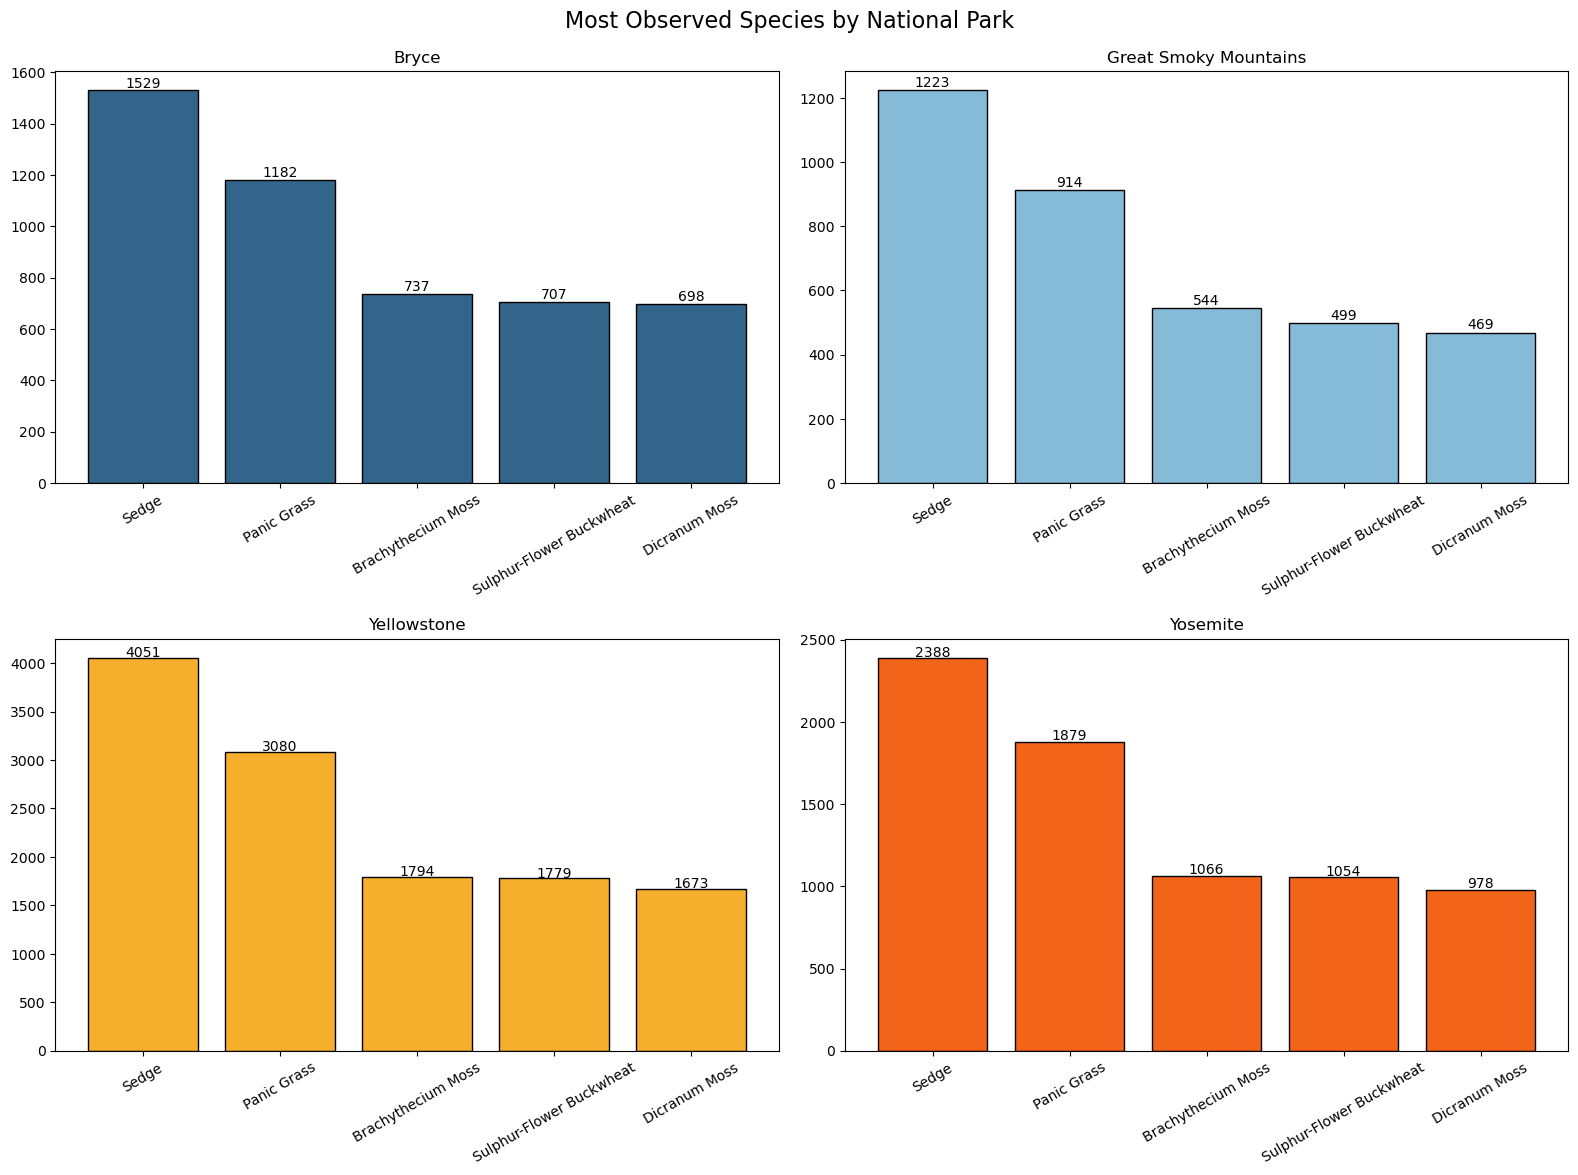

In [34]:
# this observations distribution is another indicator that this dataset is fictional!

# define the parks and subplots layout
parks = species_per_park.index.levels[0]
num_parks = len(parks)

# define colors for each park
colors = ['#33658a', '#86bbd8', '#f6ae2d', '#f26419']

# create the figure and subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

# iterate over each park
for i, park in enumerate(parks):
    sorted_species = species_per_park.loc[park].sort_values(ascending=False)

    # get the top 5 species for the current park
    top_species = sorted_species.head(5)

    # generate the bar graph
    ax = axes[i]
    ax.bar(top_species.index.get_level_values('common_names'), top_species.values, 
           edgecolor='black', color=colors[i])

    # add annotations on top of each bar
    for j, v in enumerate(top_species.values):
        ax.text(j, v + 10, str(v), ha='center')

    ax.set_title(park)

# set the title for the whole figure
fig.suptitle('Most Observed Species by National Park', fontsize=16)

# set x-axis tick positions and labels
for ax in axes:
    ax.set_xticks(range(len(top_species.index)))
    ax.set_xticklabels(top_species.index.get_level_values('common_names'), rotation=30)

# adjust the spacing between subplots
fig.tight_layout(pad=1.5)

# save the figure
plt.savefig('Figure1.png', dpi=300, bbox_inches='tight')

# display the figure
plt.show()

<br>

#### **Figure 2: Total Observations by Park**
<a id="Figure2"></a>

<br>

,park_name,observations
0,Yellowstone,1443562
1,Yosemite,863332
2,Bryce,576025
3,Great Smoky Mountains,431820


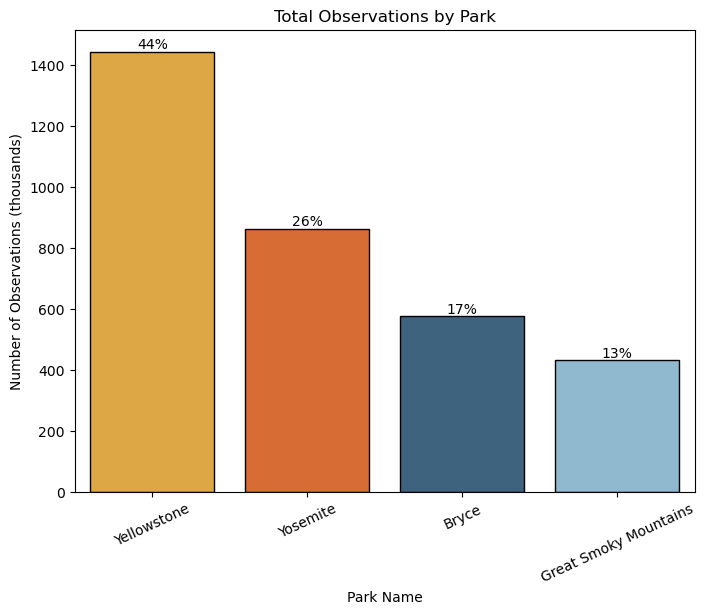

In [35]:
# adjust the plot size 
plt.subplots(figsize=(8, 6))

# sum and sort the observations for each category
total_observations_by_park = biodiversity.groupby('park_name')['observations'].sum()\
                                         .sort_values(ascending=False).reset_index()

display(total_observations_by_park)

# divide by thousand for readability
total_observations_by_park['observations'] = total_observations_by_park['observations'] / 1000

# define colors for each park
colors = ['#f6ae2d', '#f26419', '#33658a', '#86bbd8']

# barplot
sns.barplot(data=total_observations_by_park, x='park_name', y='observations', ec='k', palette=colors)
plt.title('Total Observations by Park')
plt.xlabel('Park Name')
plt.ylabel('Number of Observations (thousands)')

# add annotation for readability
for index, value in enumerate(total_observations_by_park['observations']):
    plt.text(index, value, f'{(value/total_observations_by_park.observations.sum() * 100):.0f}%', ha='center', va='bottom')

# format x-axis labels 
plt.xticks(rotation=25)

# save the figure
plt.savefig('Figure2.png', dpi=300, bbox_inches='tight')

# display the figure
plt.show()

<br>

#### **Figure 3: Top 5 Most Observed Species by Category**
<a id="Figure3"></a>

<br>

In [36]:
# most observed species by category
species_per_category = biodiversity.groupby(['category', 'common_names']).observations.sum()

# display the top 5 observed species by category
for category in species_per_category.index.levels[0]:
    sorted_per_category = species_per_category[category].sort_values(ascending=False).reset_index()
    sorted_per_category.index = sorted_per_category.index + 1
    
    display(sorted_per_category.head(5).style.set_caption(f'Category: {category}'))

,common_names,observations
1,Bullfrog,1650
2,Woodhouse's Toad,1099
3,Pickerel Frog,677
4,Marbled Salamander,661
5,Eastern Mud Salamander,656


,common_names,observations
1,Eurasian Collared Dove,1785
2,Eastern Screech-Owl,1767
3,Brewster's Warbler,1704
4,Rock Pigeon,1653
5,Chestnut-Sided Warbler,1310


,common_names,observations
1,Sea Trout,1270
2,Spotted Darter,1169
3,Spotfin Shiner,1140
4,Mottled Sculpin,1129
5,Whitetail Shiner,1120


,common_names,observations
1,Mountain Lion,2278
2,River Otter,1745
3,Beaver,1725
4,Raccoon,1692
5,Little Brown Myotis,1547


,common_names,observations
1,Dicranum Moss,4008
2,Brachythecium Moss,3910
3,Bryum Moss,3477
4,Sphagnum,3476
5,Hypnum Moss,2955


,common_names,observations
1,Northern Rubber Boa,1144
2,Western Painted Turtle,669
3,California Nightsnake,668
4,Sierra Garter Snake,653
5,Corn Snake,649


,common_names,observations
1,Sedge,9191
2,Panic Grass,7055
3,Sulphur-Flower Buckwheat,3970
4,Wild Oats,3521
5,Yellow-Seed False Pimpernel,2407


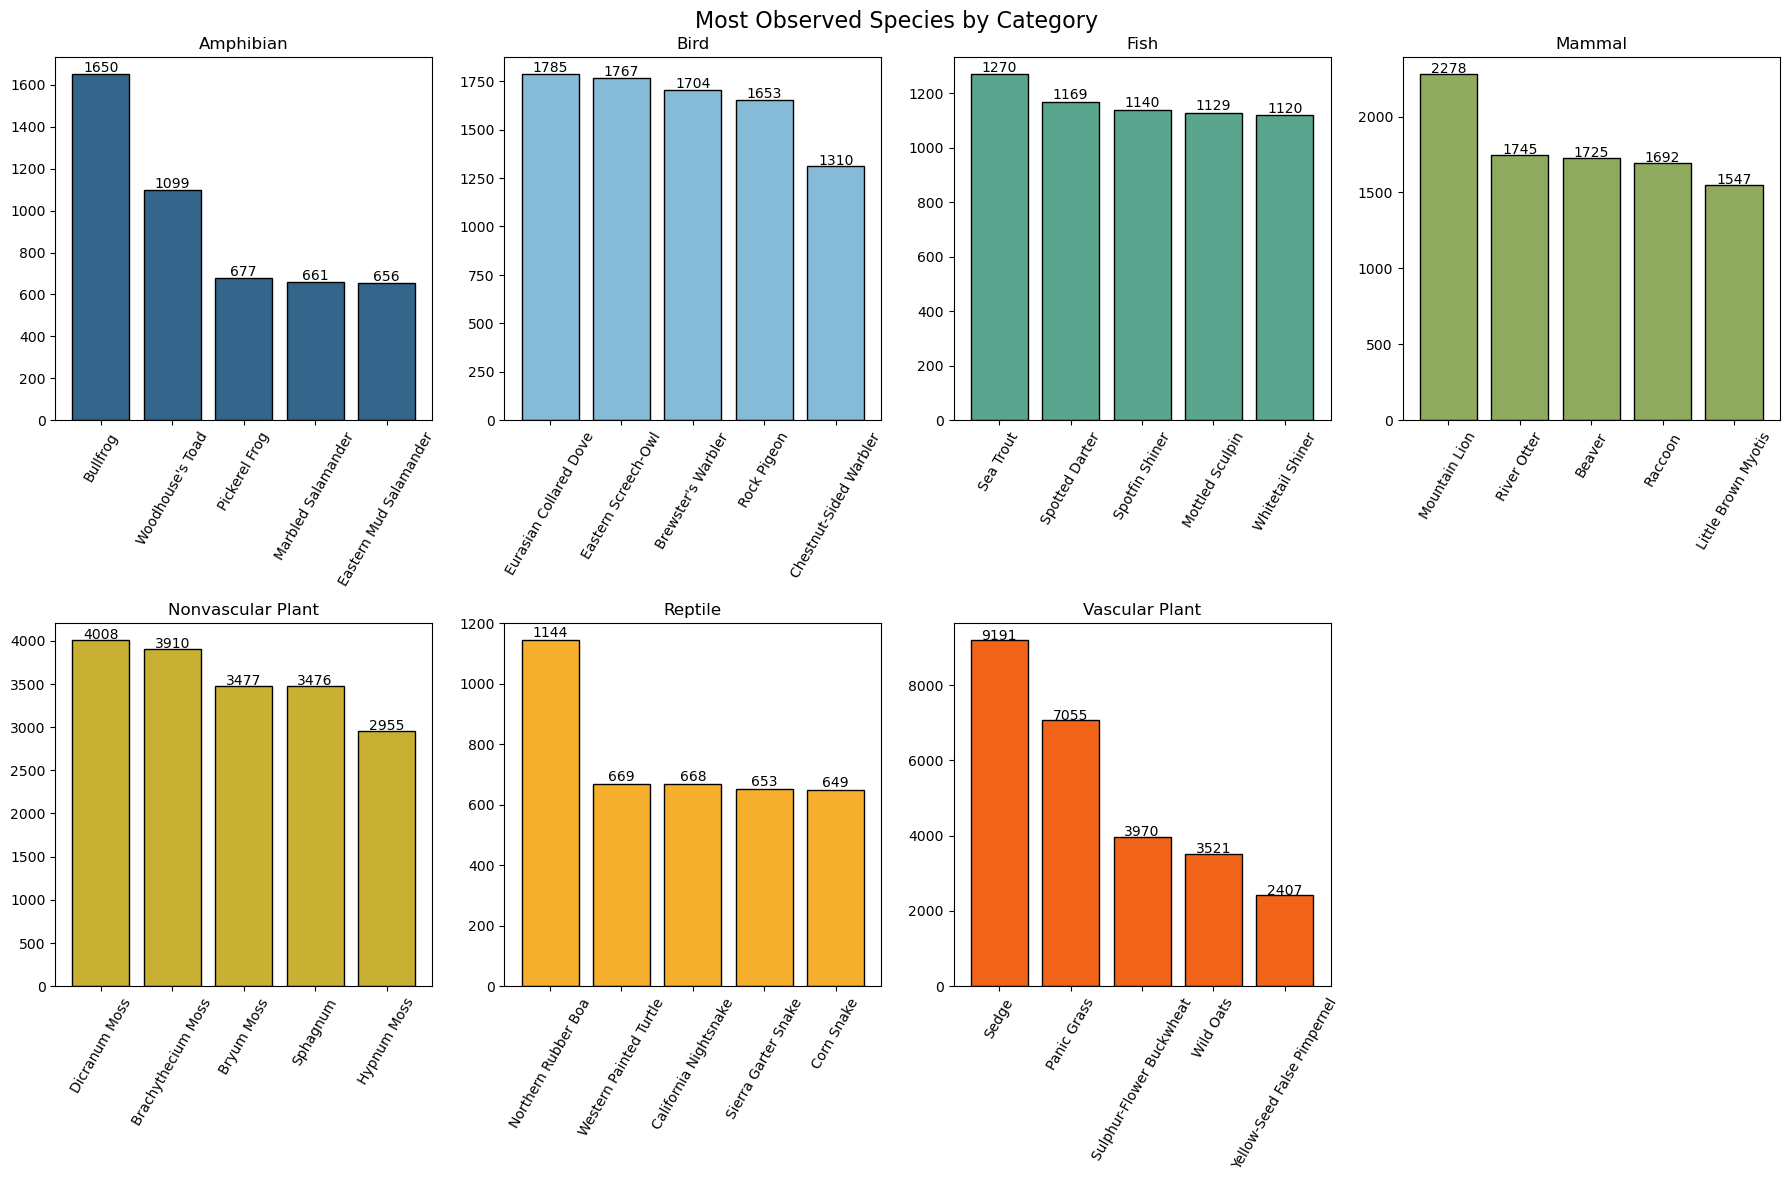

In [37]:
# define the categories and subplots layout
categories = species_per_category.index.levels[0]
num_categories = len(categories)
num_plots_per_row = 4
num_plots_per_col = (num_categories + num_plots_per_row - 1) // num_plots_per_row

# define colors for each category
colors = ['#33658a', '#86bbd8', '#59a58e', '#90ab60', '#c8b132', '#f6ae2d', '#f26419']
# order = [amphibian, bird, fish, mammal, nonvascualr plant, reptile, vascular plant]

# create the figure and subplots
fig, axes = plt.subplots(num_plots_per_col, num_plots_per_row, figsize=(18, 12))
axes = axes.flatten()

# iterate over each category
for i, category in enumerate(categories):
    sorted_species = species_per_category[category].sort_values(ascending=False)

    # get the top 5 species for the current category
    top_species = sorted_species.head(5)

    # generate the bar graph
    ax = axes[i]
    ax.bar(top_species.index, top_species.values, color=colors[i], edgecolor='black')

    # add annotations on top of each bar
    for j, v in enumerate(top_species.values):
        ax.text(j, v + 10, str(v), ha='center')

    ax.set_title(category)

    # set the title for the whole figure
    fig.suptitle('Most Observed Species by Category', fontsize=16)

    # set x-axis tick positions and labels
    ax.set_xticks(range(len(top_species.index)))
    ax.set_xticklabels(top_species.index, rotation=60)
    
# hide empty subplots
if num_categories < num_plots_per_row * num_plots_per_col:
    for i in range(num_categories, num_plots_per_row * num_plots_per_col):
        fig.delaxes(axes[i])

# adjust the spacing between subplots
fig.tight_layout(pad=1)

# save the figure
plt.savefig('Figure3.png', dpi=300, bbox_inches='tight')

# display the figure
plt.show()

<br>

#### **Figure 4: Total Observations by Category**
<a id="Figure4"></a>

<br>

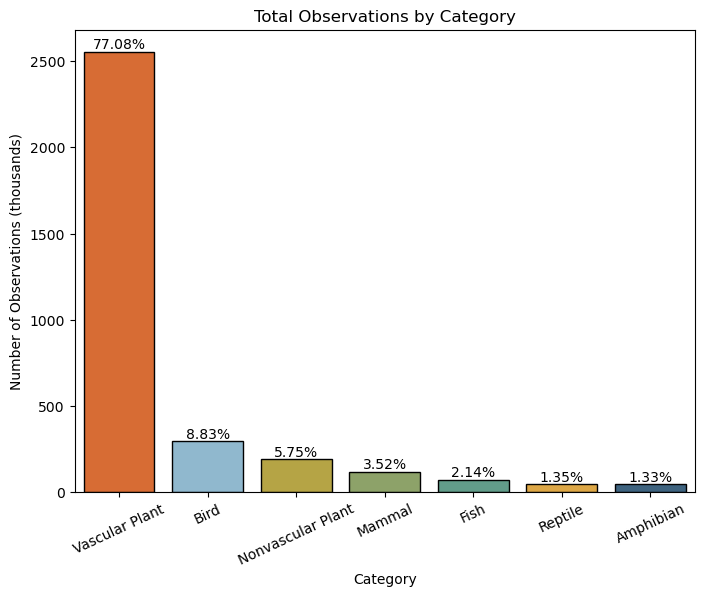

In [38]:
# adjust the plot size 
plt.subplots(figsize=(8, 6))

# sum and sort the observations for each category
total_observations_per_category = biodiversity.groupby('category')['observations'].sum()\
                                              .reset_index().sort_values('observations', ascending=False)

# divide by thousand for readability
total_observations_per_category['observations'] = total_observations_per_category['observations'] / 1000

# define colors for each category
colors = ['#f26419', '#86bbd8', '#c8b132', '#90ab60', '#59a58e', '#f6ae2d', '#33658a']

# barplot
sns.barplot(data=total_observations_per_category, x='category', y='observations', ec='k', palette=colors)
plt.title('Total Observations by Category')
plt.xlabel('Category')
plt.ylabel('Number of Observations (thousands)')

# add annotation for readability
for index, value in enumerate(total_observations_per_category['observations']):
    plt.text(index, value, f'{(value/total_observations_per_category.observations.sum() * 100):.2f}%', ha='center', va='bottom')
    
# format x-axis labels 
plt.xticks(rotation=25)

# save the figure
plt.savefig('Figure4.png', dpi=300, bbox_inches='tight')

# display the figure
plt.show()

<br>

#### **Figure 5: Species Distribution by Category**
<a id="Figure5"></a>

<br>

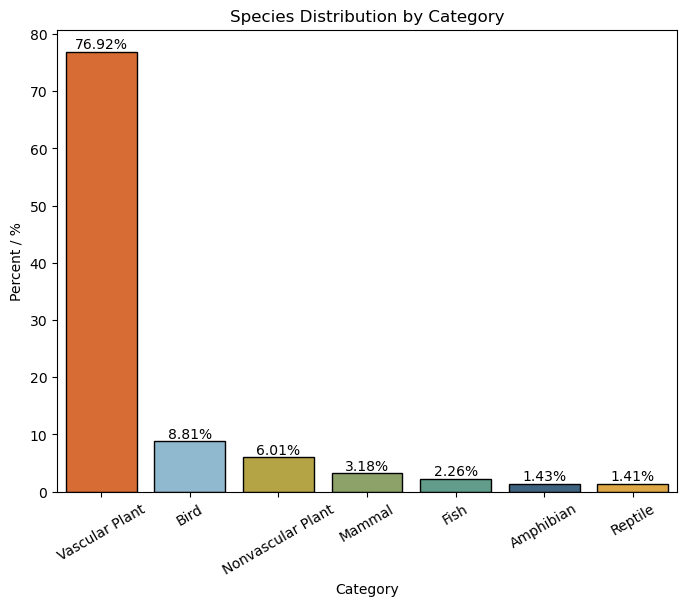

In [39]:
# plot size adjustment
plt.subplots(figsize=(8, 6))

# count species by category
species_by_category = pd.DataFrame(biodiversity.groupby('category').scientific_name.nunique()\
                                .sort_values(ascending=False).reset_index()\
                                .rename(columns={'scientific_name': 'count'}))

# calculate the percentage of each category
species_by_category['percentage'] = (species_by_category['count'] / species_by_category['count'].sum() * 100)

# define colors for each category
colors = ['#f26419', '#86bbd8', '#c8b132', '#90ab60', '#59a58e', '#33658a', '#f6ae2d']

# seaborn bar plot
sns.barplot(data=species_by_category, x='category', y='percentage', ec='k', palette=colors)
plt.title('Species Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Percent / %')
plt.xticks(rotation=30)

# graph annotation
for index, value in enumerate(species_by_category['percentage']):
    plt.text(index, value, f'{value:.2f}%', ha='center', va='bottom')

# save the figure
plt.savefig('Figure5.png', dpi=300, bbox_inches='tight')

# display the figure
plt.show()

<br>

#### **Table 1: Species Distribution by Category: Count & Percentage**
<a id="Table1"></a>

<br>

In [40]:
display(species_by_category.style.set_caption('Species Distribution by Category: Observations Count and Percentage'))

,category,count,percentage
0,Vascular Plant,4262,76.917524
1,Bird,488,8.807075
2,Nonvascular Plant,333,6.009746
3,Mammal,176,3.176322
4,Fish,125,2.255910
5,Amphibian,79,1.425735
6,Reptile,78,1.407688


<br>

#### **4.2: How are species distributed by conservation status?**
<a id="Q2"></a>

<br>

The **conservation_status** column has 5 possible values:
- `Least Concern`: not a focus of conservation efforts
- `Species of Concern`: declining or appear to be in need of conservation
- `Threatened`: vulnerable to endangerment in the near future
- `In Recovery`: formerly `Endangered`, but currently neither in danger of extinction throughout all or a significant portion of its range
- `Endangered`: seriously at risk of extinction

<br>

#### **Figure 6: Species Distribution by Conservation Status**
<a id="Figure6"></a>

<br>

,conservation_status,count,percentage
0,Least Concern,5362,96.769536
1,Species of Concern,151,2.725140
2,Endangered,15,0.270709
3,Threatened,10,0.180473
4,In Recovery,3,0.054142


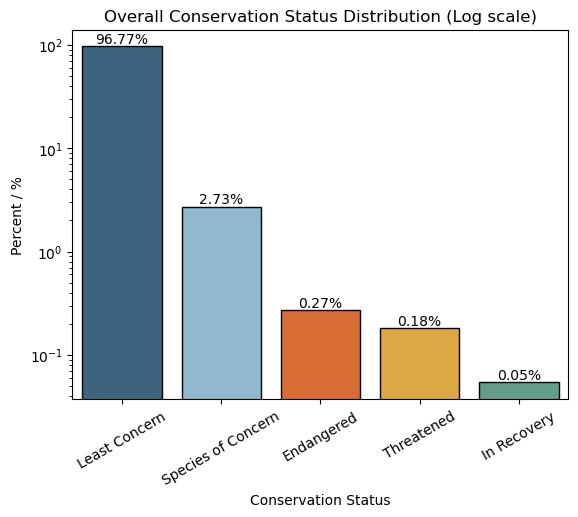

In [41]:
# spcecies distribution by conservation status
conservation_status_dist = pd.DataFrame(biodiversity.groupby('conservation_status')\
                                        .scientific_name.nunique().sort_values(ascending=False)\
                                        .reset_index().rename(columns={'index':'category', 'scientific_name': 'count'}))

# calculating percentage
conservation_status_dist['percentage'] = (conservation_status_dist['count'] /\
                                          conservation_status_dist['count'].sum() * 100)

display(conservation_status_dist.style.set_caption('Species Distribution by Conservation Status: Count and Percentage'))

# define colors for each conservation status
colors = ['#33658a', '#86bbd8', '#f26419', '#f6ae2d', '#59a58e']

# seaborn bar plot
sns.barplot(data=conservation_status_dist, x='conservation_status', y='percentage', ec='k', palette=colors)
plt.title('Overall Conservation Status Distribution (Log scale)')
plt.xlabel('Conservation Status')
plt.ylabel('Percent / %')
plt.xticks(rotation=30)

# graph annotation
for index, value in enumerate(conservation_status_dist['percentage']):
    plt.text(index, value, f'{value:.2f}%', ha='center', va='bottom')

# log scale transformation for legibility'
plt.yscale('log')

# save the figure
plt.savefig('Figure6.png', dpi=300, bbox_inches='tight')

# display the figure
plt.show()

<br>

#### **Table 2: Conservation Status Distribution by Park**
<a id="Table2"></a>

<br>

In [42]:
# counting conservation status by parkk
conservation_status_by_park = pd.DataFrame(biodiversity.groupby(['park_name', 'conservation_status'])\
                                           .scientific_name.count()\
                                           .unstack(fill_value=0))

# this table serves as another indication that ficticious data is being used for this analysis
display(conservation_status_by_park.style.set_caption('Conservation Status Distribution by Park'))

conservation_status,Endangered,In Recovery,Least Concern,Species of Concern,Threatened
park_name,,,,,
Bryce,15,3,5362,151,10
Great Smoky Mountains,15,3,5362,151,10
Yellowstone,15,3,5362,151,10
Yosemite,15,3,5362,151,10


<br>

#### **Table 3: Conservation Status Distribution by Category**
<a id="Table3"></a>

<br>

In [43]:
# calculating number of species by conservation status per category
conservation_status_by_category = pd.DataFrame(biodiversity.groupby(['category','conservation_status'])\
                                           .scientific_name.nunique()\
                                           .unstack(fill_value=0))

# adding a row called 'total' with the total sum of each column
conservation_status_by_category.loc['Total'] = conservation_status_by_category.sum()

# add a column called "total" with the total sum for each category
conservation_status_by_category['Total'] = conservation_status_by_category.sum(axis=1)

# reorganizing columns
conservation_status_by_category = conservation_status_by_category[['Least Concern', 'In Recovery', 'Species of Concern', 'Threatened', 'Endangered', 'Total']]

# display table
display(conservation_status_by_category.style.set_caption('Conservation Status Distribution by Category'))

conservation_status,Least Concern,In Recovery,Species of Concern,Threatened,Endangered,Total
category,,,,,,
Amphibian,72,0,4,2,1,79
Bird,413,3,68,0,4,488
Fish,114,0,4,4,3,125
Mammal,146,0,22,2,6,176
Nonvascular Plant,328,0,5,0,0,333
Reptile,73,0,5,0,0,78
Vascular Plant,4216,0,43,2,1,4262
Total,5362,3,151,10,15,5541


<br>

#### **4.3: Are certain types of species more likely to be endagered?**
<a id="Q3"></a>

<br>

<br>

#### **Table 4: Species Distrbution by Conservation Status per Category (Percentage)**
<a id="Table4"></a>

<br>

In [44]:
# table to calculate the number of species by conservation status per category
endangerment_table = conservation_status_by_category.copy().drop(labels=['Total'], axis=1)

# calculate the percentage of total for each row
endangerment_table_percent = endangerment_table.copy()
for column in endangerment_table.columns:
        endangerment_table_percent[column] = endangerment_table_percent[column] / endangerment_table_percent[column]['Total'] * 100

display(endangerment_table_percent.style.set_caption('Conservation Status Distribution by Category (Percentage)').format('{:.2f}'))

conservation_status,Least Concern,In Recovery,Species of Concern,Threatened,Endangered
category,,,,,
Amphibian,1.34,0.00,2.65,20.00,6.67
Bird,7.70,100.00,45.03,0.00,26.67
Fish,2.13,0.00,2.65,40.00,20.00
Mammal,2.72,0.00,14.57,20.00,40.00
Nonvascular Plant,6.12,0.00,3.31,0.00,0.00
Reptile,1.36,0.00,3.31,0.00,0.00
Vascular Plant,78.63,0.00,28.48,20.00,6.67
Total,100.00,100.00,100.00,100.00,100.00


<br>

#### **Figure 7: Species of Concern Distribution by Category**
<a id="Figure7"></a>

<br>

            category  count
0               Bird     68
1     Vascular Plant     43
2             Mammal     22
3  Nonvascular Plant      5
4            Reptile      5
5          Amphibian      4
6               Fish      4


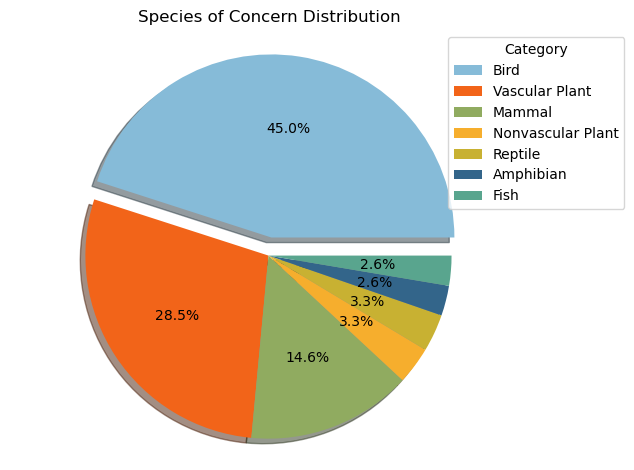

In [45]:
# dataframe containing only 'Species of Concern' species
species_of_concern_df = biodiversity.loc[biodiversity['conservation_status'] == 'Species of Concern']

# count of 'Species of Concern' species by category
species_of_concern_dist = species_of_concern_df.groupby('category').scientific_name\
                               .nunique().sort_values(ascending=False).reset_index()\
                               .rename(columns={'index':'category', 'scientific_name': 'count'})

print(species_of_concern_dist)

# define colors for each category
# order = [bird, vascular plant, mammal, reptile, nonvascular plant, amphibian, fish]
colors = ['#86bbd8', '#f26419', '#90ab60', '#f6ae2d', '#c8b132', '#33658a', '#59a58e']

# pie chart
pie_wedges = species_of_concern_dist['count']
pie_labels = species_of_concern_dist.category

# "exploding" the 1st slice (i.e. 'Bird')
explode = (0.1, 0, 0, 0, 0, 0, 0)  

# matplot pie chart
fig7, ax1 = plt.subplots()
ax1.pie(x=pie_wedges, explode=explode, colors=colors, shadow=True, autopct='%.1f%%')
ax1.axis('equal')
plt.title('Species of Concern Distribution')
plt.legend(pie_labels, title='Category', loc='upper right', bbox_to_anchor=(1.2,1))
plt.tight_layout()

# save the figure
plt.savefig('Figure7.png', dpi=300, bbox_inches='tight')

# display the figure
plt.show()

In [46]:
species_of_concern_birds = biodiversity[(biodiversity['conservation_status'] == 'Species of Concern') \
                                        & (biodiversity['category'] == 'Bird')]\
                                        .groupby('common_names')\
                                        .observations.sum()\
                                        .sort_values(ascending=False).reset_index()

# start row index from 1
species_of_concern_birds.index = species_of_concern_birds.index + 1

# display "Most Observed 'Species of Concern' Birds"
display(species_of_concern_birds.head(10).style.set_caption("Most Observed 'Species of Concern' Birds (Top 10)"))

,common_names,observations
1,Sand Martin,1042
2,Western Osprey,1040
3,Black-Crowned Night Heron,1018
4,Great Northern Loon,1016
5,White-Faced Ibis,595
6,Lesser Scaup,581
7,Marbled Godwit,575
8,American White Pelican,569
9,Olive-Sided Flycatcher,563
10,Williamson's Sapsucker,554


<br>

#### **Figure 8: Threatened Species Distribution by Category**
<a id="Figure8"></a>

<br>

         category  count
0            Fish      4
1       Amphibian      2
2          Mammal      2
3  Vascular Plant      2


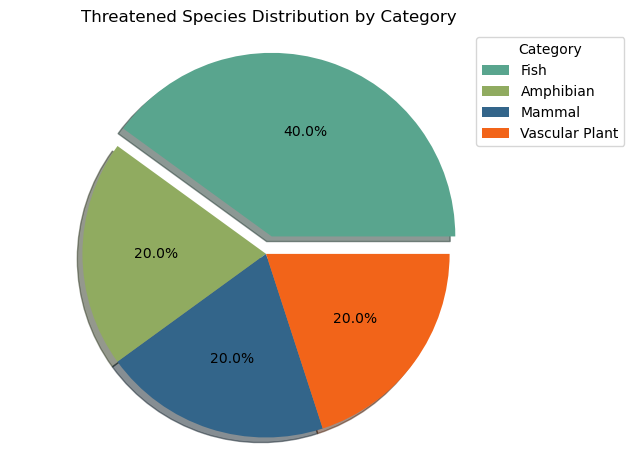

In [47]:
# dataframe containing only 'Threatened' species
threatened_species_df = biodiversity.loc[biodiversity['conservation_status'] == 'Threatened']

# count of 'Threatened' species by category
threatened_species_dist = threatened_species_df.groupby('category').scientific_name\
                               .nunique().sort_values(ascending=False).reset_index()\
                               .rename(columns={'index':'category', 'scientific_name': 'count'})
print(threatened_species_dist)

# define colors for each category
# order = [fish, mammal, amphibian, vascular plant]
colors = ['#59a58e', '#90ab60', '#33658a', '#f26419']

# pie chart
pie_wedges = threatened_species_dist['count']
pie_labels = threatened_species_dist.category

# "exploding" the 1st slice (i.e. 'Fish')
explode = (0.1, 0, 0, 0)  

# matplot pie chart
fig8, ax1 = plt.subplots()
ax1.pie(x=pie_wedges, explode=explode, colors=colors, shadow=True, autopct='%.1f%%')
ax1.axis('equal')
plt.title('Threatened Species Distribution by Category')
plt.legend(pie_labels, title='Category', loc='upper right', bbox_to_anchor=(1.2,1))
plt.tight_layout()

# save the figure
plt.savefig('Figure8.png', dpi=300, bbox_inches='tight')

# display the figure
plt.show()

In [48]:
threatened_fish = biodiversity[(biodiversity['conservation_status'] == 'Threatened') \
                                        & (biodiversity['category'] == 'Fish')]\
                                        .groupby('common_names')\
                                        .observations.sum()\
                                        .sort_values(ascending=False).reset_index()

# start row index from 1
threatened_fish.index = threatened_fish.index + 1

# display "Most Observed 'Threatened' Fish Species by Park"
display(threatened_fish.style.set_caption("Most Observed 'Threatened' Fish Species"))

,common_names,observations
1,Rainbow Trout,813
2,Lahontan Cutthroat Trout,301
3,Yellowfin Madtom,289
4,Spotfin Chub,242


<br>

#### **Figure 9: Endangered Species Distribution by Category**
<a id="Figure9"></a>

<br>

         category  count
0          Mammal      6
1            Bird      4
2            Fish      3
3       Amphibian      1
4  Vascular Plant      1


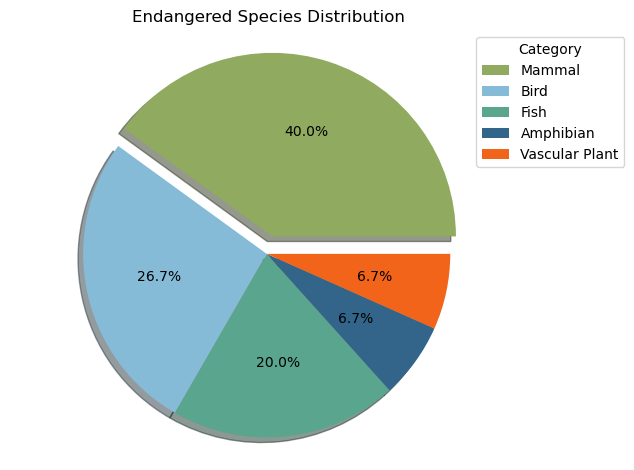

In [49]:
# dataframe containing only 'Species of Concern' species
endangered_species_df = biodiversity.loc[biodiversity['conservation_status'] == 'Endangered']

# count of 'Species of Concern' species by category
endangered_species_dist = endangered_species_df.groupby('category').scientific_name\
                               .nunique().sort_values(ascending=False).reset_index()\
                               .rename(columns={'index':'category', 'scientific_name': 'count'})
print(endangered_species_dist)

# define colors for each category
colors = ['#90ab60', '#86bbd8', '#59a58e', '#33658a', '#f26419']

# pie chart
pie_wedges = endangered_species_dist['count']
pie_labels = endangered_species_dist.category

# "exploding" the 1st slice (i.e. 'Mammal')
explode = (0.1, 0, 0, 0, 0)  

# matplot pie chart
fig9, ax1 = plt.subplots()
ax1.pie(x=pie_wedges, explode=explode, colors=colors, shadow=True, autopct='%.1f%%')
ax1.axis('equal')
plt.title('Endangered Species Distribution')
plt.legend(pie_labels, title='Category', loc='upper right', bbox_to_anchor=(1.2,1))
plt.tight_layout()

# save the figure
plt.savefig('Figure9.png', dpi=300, bbox_inches='tight')

# display the figure
plt.show()

In [50]:
endangered_mammal = biodiversity[(biodiversity['conservation_status'] == 'Endangered') \
                                        & (biodiversity['category'] == 'Mammal')]\
                                        .groupby('common_names')\
                                        .observations.sum()\
                                        .sort_values(ascending=False).reset_index()

# start row index from 1
endangered_mammal.index = endangered_mammal.index + 1

# display "Most Observed 'Threatened' Fish Species by Park"
display(endangered_mammal.style.set_caption("Most Observed 'Endangered' Mammal Species"))

,common_names,observations
1,Wolf,715
2,Gray Myotis,160
3,Northern Flying Squirrel,153
4,Sierra Nevada Bighorn Sheep,153
5,Social Myotis,145
6,Red Wolf,137


<br>

#### **4.4: Are the differences between species and their conservation status significant?**
<a id="Q4"></a>

<br>

<br>

#### **4.4.1: Chi-Square Test**
<a id="Q4.1"></a>

<br>

**Chi-squared (χ²) Test**:

(https://en.wikipedia.org/wiki/Chi-squared_test)

The chi-square test is used to determine the association between two categorical variables. It compares the observed frequencies in a contingency table with the expected frequencies under the assumption of independence. The test statistic, χ², is calculated based on the differences between observed and expected frequencies. The p-value is then derived from the chi-square distribution with appropriate degrees of freedom. A low p-value suggests that there is a significant association between the variables.

<br>
<br>

To analyze the statistics and p-values of a Chi-Square test, **the obtained p-value is usually compared to a significance level (such as 0.05; 5%)**. If the **p-value is smaller** than the **significance level**, **the null hypothesis is rejected** and it is concluded that there is evidence of an association between the variables. Conversely, if the **p-value is larger** than the **significance level**, **the null hypothesis stands** and **it can be concluded that there is insufficient evidence to suggest an association**.

Statistical hypothesis testing is based on rejecting the null hypothesis if the likelihood of the observed data under the null hypotheses is low.

<br>
<br>

**Null Hypothesis**: There are no significant differences between the protection status and unprotected species.

**Alternative Hypothesis**: There are significant differences between the protected and unprotected species.

<br>
<br>

To analyze the given results, we **compare the p-values** with the predetermined **significance level of 0.05**. The significance level, also known as **alpha (α)**, **represents the threshold below which we reject the null hypothesis**.

<br>

<br>

#### **Table 5: Species Distrbution by Protection Stauts (Count, Total & Percentage)**
<a id="Table5"></a>

<br>

<br>

To explore whether some species are more likely to be endagered than others, a new column called **is_protected** is created to include any protected species; species that have a a conservation status other than `Least Concern`.

<br>

In [51]:
# adding 'is_protected' column to the "biodiversity" table
biodiversity['is_protected'] = biodiversity.conservation_status != 'Least Concern'

# counting species by category and protection status
protected_dist = biodiversity.groupby(['category', 'is_protected'])\
                    .scientific_name.nunique()\
                    .reset_index()\
                    .pivot(columns='is_protected', index='category', values='scientific_name')\
                    .reset_index()

# renaming columns from pivoted df
protected_dist.columns = ['category', 'not_protected', 'protected']

# calculating totals by category
protected_dist['total'] = protected_dist.protected + protected_dist.not_protected

# calculating percent protected by category
protected_dist['percent_protected'] = (protected_dist.protected/protected_dist.total * 100)

# reordering coolumns
protected_dist = protected_dist[['category', 'protected', 'not_protected', 'total', 'percent_protected']]

#
display(protected_dist.style.set_caption('Category Distribution by Protection Status'))

,category,protected,not_protected,total,percent_protected
0,Amphibian,7,72,79,8.860759
1,Bird,75,413,488,15.368852
2,Fish,11,114,125,8.800000
3,Mammal,30,146,176,17.045455
4,Nonvascular Plant,5,328,333,1.501502
5,Reptile,5,73,78,6.410256
6,Vascular Plant,46,4216,4262,1.079305


<br>

For this statistical analysis, chi-squared tests were used to determine if different species had statistically significant differences in conservation status rates. In order to run a chi squared test, 2x2 contingency tables were created for all potential pairings of categories. 

The contingency tables were prepared using the following format:

    contingency_table = [[7, 72], [75, 413]]

<br>

The alpha value used to determine **statistical significance was 0.05**.

<br>

In [52]:
# function that calculates Chi2 tests and stores the data into the "test_results_df" dataframe
def calculate_test(contingency_table):
    # calculating chi2 results
    chi2, pval, dof, expected = chi2_contingency(contingency_table)

    # storing results in dataframe
    test_results_df = pd.DataFrame(columns=['Test', 'Statistic', 'p-value'])
    test_results_df.loc[0] = ['Chi2', chi2, pval]
    
    return test_results_df

In [53]:
# function that iterates through "protected_dist" and runs the "calculate_test()" function
# for each 2x2 contingency table (except for AA; if there is AB, exclude BA)

# creating empty lists to store categories under Null and Alternative hypotheses
null_results = []
alternative_results = []

iteration = 0

# calculate the total number of iterations
total_iterations = (len(protected_dist) * (len(protected_dist) - 1)) // 2

# set the desired p-value threshold; 5% can be considered as the universal standard
# Divided by "total_iterations" to include the Bonferroni correction
# Expected output is 21 calculations; Checks out!
p_value = 0.05

# loops that ensure the right amount of combinations for the contingency tables
for i in range(len(protected_dist)):
    not_protected_1 = protected_dist.iloc[i]['not_protected']
    protected_1 = protected_dist.iloc[i]['protected']
    category_1 = protected_dist.category.iloc[i]
    
    for n in range(i+1, len(protected_dist)):
        not_protected_2 = protected_dist.iloc[n]['not_protected']
        protected_2 = protected_dist.iloc[n]['protected']
        category_2 = protected_dist.category.iloc[n]
        
        result = calculate_test([[not_protected_1, protected_1], [not_protected_2, protected_2]])

        # compare the p-value to the given threshold and store everything
        # reasoning for "any" is to force comparison with the most rigorous test (Barnards)
        if any(result['p-value'] > p_value):
            alternative_results.append({'Category 1': category_1,
                                        'Category 2': category_2,
                                        'Chi2 statistic': result['Statistic'][0],
                                        'Chi2 p-value': result['p-value'][0],
                                        'Hypothesis': 'Alternative'})
        else:
            null_results.append({'Category 1': category_1,
                                 'Category 2': category_2,
                                 'Chi2 statistic': result['Statistic'][0],
                                 'Chi2 p-value': result['p-value'][0],
                                 'Hypothesis': 'Null'})

        iteration += 1
        

# create DataFrames to categorize the results
null_hypothesis_df = pd.DataFrame(null_results)
alternative_hypothesis_results = pd.DataFrame(alternative_results)

# merge null and alternative hypothesis DataFrames
test_results = pd.concat([null_hypothesis_df, alternative_hypothesis_results], ignore_index=True)

print(f'Calculations successfully completed ({iteration}/{total_iterations} iterations)')


Calculations successfully completed (21/21 iterations)


<br>

#### **Table 6: Chi-Squared Test Results**
<a id="Table6"></a>

<br>

In [54]:
display(test_results.style.set_caption(f'Chi-squared test results (Significance level: {p_value})'))

,Category 1,Category 2,Chi2 statistic,Chi2 p-value,Hypothesis
0,Amphibian,Nonvascular Plant,9.765104,0.001779,Null
1,Amphibian,Vascular Plant,32.757298,0.000000,Null
2,Bird,Nonvascular Plant,41.717458,0.000000,Null
3,Bird,Vascular Plant,354.423327,0.000000,Null
4,Fish,Nonvascular Plant,12.276440,0.000459,Null
5,Fish,Vascular Plant,50.587109,0.000000,Null
6,Mammal,Nonvascular Plant,41.052600,0.000000,Null
7,Mammal,Reptile,4.289183,0.038356,Null
8,Mammal,Vascular Plant,246.587042,0.000000,Null
9,Nonvascular Plant,Reptile,4.513570,0.033627,Null


<br>

**Null Hypothesis**: There are no significant differences between the protected and unprotected species.

**Alternative Hypothesis**: There are significant differences between the protected and unprotected species.

<br>

<br>

# **Discussion**
<a id="Discussion"></a>

<br>

This project sought out to analyze biodiversity data from the U.S. National Parks Service collected over a 7 day period in four National Parks:

<br>

> - **Yellowstone National Park**
> - **Yosemite National Park**
> - **Great Smoky Mountains National Park**
> - **Bryce National Park**

<br>

The dataset provided contained information on **5541 unique species** across **7 categories**:

<br>

> - **Mammal**
> - **Bird**
> - **Reptile**
> - **Amphibian**
> - **Fish**
> - **Vascular Plant**
> - **Nonvascular Plant**

<br>

The data showed that the **most observed species**, in each park, is a Vascular Plant commonly referred to as a `Sedge` (https://en.wikipedia.org/wiki/Cyperaceae). The five most observed species for each National Park is shown in [**Figure 1**](#Figure1), while [**Figure 2**](#Figure2) shows a distribution of the number of observations by National Park with Yellowstone having the largest share.

<br>

[**Figure 3**](#Figure3) depicts the **top five most observed species in each category**. In this dataset, observations served as one of the key analytic factors. When looking at the **total count and relative proportions of observations by category**, `Vascular Plants` were found to account for 77% of total observations, as seen in [**Figure 4**](#Figure4). This is understandable given that plants have a high species abundance, a wide range, remain immobile, and are often easily identifiable. This statement is further supported when looking at the **total count and relative proportions of species by category** in [**Figure 5**](#Figure5).

<br>

Additionally, the dataset also includes **five distinct conservation status groups** for each species, which help **to indicate the degree to which a species is threatened or protected**:

> - **Least Concern**: not a focus of conservation efforts
> - **Species of Concern**: declining or appear to be in need of conservation
> - **Threatened**: vulnerable to endangerment in the near future
> - **In Recovery**: formerly `Endangered`, but currently neither in danger of extinction throughout all or a significant portion of its range
> - **Endangered**: seriously at risk of extinction

<br>

[**Figure 6**](#Figure6) provides an **overview of the conservation status distribution**, showing that vast majority of species within the dataset belong to the **"Least Concern" category with more than 96% of the total species**. A more comprehensive breakdown of this is shown in [**Table 3**](#Table3), which contains this same information broken down by **conservation status and species category**. [**Table 4**](#Table4) presents these results in the form of **percentages, offering another clear representation of the data**. `Species of Concern`, `Threatened` species, and species that are `Endangered` were further analyzed in more detail.

<br>

[**Figures 7**](#Figure7), [**8**](#Figure8) and [**9**](#Figure9) present a summary of the conservation statuses for `Species of Concern`, `Threatened` and `Endangered` species, respectively. When looking at `Species of Concern`, the largest proportion of species belong the `Bird` category at 45% while `Fish` and `Mammals` make the up the majority at 40% of `Threatened` and `Endangered` species, respectively. In addition to the firgures, there are tables highlighting the **most observed species for their respective conservation status**.

<br>

In addition to analyzing the biodiversity data, this prroject sought out to answer whether or not there was a relationship between protection status and species category. This was assessed using a Chi-Squared test, as shown in section [**4.4.1**](#Q4.1). [**Table 6**](#Table6) shows the test **results for each category pair, including the corresponding statistic and p-value for each test**. Additionally, there is a "**Hypothesis**" column indicating whether the **Null Hypothesis is accepted or rejected**. In case of rejection, it states "Alternative".

<br>

These results indicate that **mammals and birds** are the **most endangered categories** because they account for the highest percentage of all protected species, followed by **fish and amphibians**. Some protected and unprotected categories show **statistically significant differences**, while others do not. 

<br>

To conclude, ensuring the survival of at-risk species is imperative to maintaining biodiversity in wildlife populations. Aside from the fact that, while inspired by real data, this dataset is mostly fictitious and only includes observations collected over a 7-day period, making it impossible to analyze changes over time. It would be interesting to obtain real data and conduct a more thorough analysis to investigate what factors might contribute to the substantial number of bird species falling under the `Species of Concern` conservation status, as well as the fish species classified as `Threatened`. Based off this data alone, one may begin to think of several **potential risk factors**  that may be influence these conservation statuses, such as: 

> - **Water pollution**
> - **Detrimental impact of wildfires**
> - **Unsustainable hunting practices**
> - **Habitat destruction**

<br>

